In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup
import pickle

In [6]:
with open('fulldataframe.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    full = pickle.load(f)

In [32]:
ingreddict=[]
for u in full.url:
    response=requests.get('https://www.skinstore.com/the-ordinary-aha-30-bha-2-peeling-solution-30ml/{}.html'.format(u))
    soup=BeautifulSoup(response.content,'html.parser')
    info=soup.findAll('div',{'data-information-component':'ingredients'})
    ingredients=[]
    for i in info:
#         if ('Ingredients:') in i:
        ingredients.append(i.text.replace('\n',''))
    ingreddict.append({'url':u,'ingredients':ingredients})
ingreddf=pd.DataFrame(ingreddict)

In [33]:
full['ingredients']=ingreddf['ingredients']

In [35]:
with open('fullIngredients.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(full, f, pickle.HIGHEST_PROTOCOL)

In [49]:
full.head()

,price,prodName,rating,url,age,darkcircles,acne,dry,redness,sensitive,oil,normal,treats,type,ingredients
0,7.20,The Ordinary AHA 30% + BHA 2% Peeling Solution...,4.78,11429304,0,0,0,1,1,0,0,0,4,"[exfoliator, treatment, tool]","[Glycolic Acid, Aqua (Water), Arginine, Propan..."
1,37.40,Paula's Choice Resist 10% Niacinamide Booster ...,5.0,11316245,0,0,0,0,1,1,0,0,3,"[treatment, serum]","[Water (Aqua), Niacinamide (vitamin B3, barrie..."
2,25.08,Paula's Choice Skin Perfecting 2% BHA Liquid E...,5.0,11174178,1,0,1,1,1,0,1,1,1,[exfoliator],"[Aqua, Methylpropanediol (hydration), Butylene..."
3,85.00,Slip Silk Pillowcase - Queen - White,5.0,11561755,0,0,1,0,1,1,0,1,1,[],"[100% Silk., 100% Silk.]"
4,85.00,Slip Silk Pillowcase - Queen - Pink,5.0,11561754,0,0,1,0,1,1,0,1,1,[],"[100% Silk, 100% Silk]"


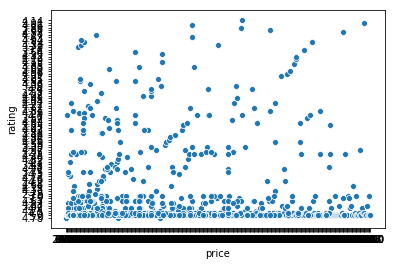

In [50]:
sns.scatterplot(x='price',y='rating',data=full)

In [52]:
full.set_index('url',inplace=True)
full

,price,prodName,rating,age,darkcircles,acne,dry,redness,sensitive,oil,normal,treats,type,ingredients
url,,,,,,,,,,,,,,
11429304,7.20,The Ordinary AHA 30% + BHA 2% Peeling Solution...,4.78,0,0,0,1,1,0,0,0,4,"[exfoliator, treatment, tool]","[Glycolic Acid, Aqua (Water), Arginine, Propan..."
11316245,37.40,Paula's Choice Resist 10% Niacinamide Booster ...,5.0,0,0,0,0,1,1,0,0,3,"[treatment, serum]","[Water (Aqua), Niacinamide (vitamin B3, barrie..."
11174178,25.08,Paula's Choice Skin Perfecting 2% BHA Liquid E...,5.0,1,0,1,1,1,0,1,1,1,[exfoliator],"[Aqua, Methylpropanediol (hydration), Butylene..."
11561755,85.00,Slip Silk Pillowcase - Queen - White,5.0,0,0,1,0,1,1,0,1,1,[],"[100% Silk., 100% Silk.]"
11561754,85.00,Slip Silk Pillowcase - Queen - Pink,5.0,0,0,1,0,1,1,0,1,1,[],"[100% Silk, 100% Silk]"
11175784,225.00,ARgENTUM la potion infinie Restorative Day and...,5.0,0,0,1,1,1,1,1,1,1,[moisturizer],"[Colloidal Silver, Cetearyl Alcohol, Hydrogena..."
11561765,105.00,Slip Silk Pillowcase King - White,5.0,0,0,1,0,1,1,0,1,1,[],"[100% Silk, 100% Silk]"
11561753,85.00,Slip Silk Pillowcase - Queen - Charcoal,5.0,0,0,1,0,1,1,0,1,1,[],"[100% Silk, 100% Silk]"
11561759,85.00,Slip Silk Pillowcase - Queen - Silver,5.0,0,0,1,0,1,1,0,1,1,[],"[100% Silk, 100% Silk]"
